# Visualizing the Six Degrees of Kevin Bacon
As I try to find new and interesting ways to visualize data, I have made occasional use of the Network Graph.  I've written some network graphs in [D3](https://d3js.org/), but Python has a great tool, [networkx](https://networkx.github.io/), that makes building and visualizing your network graphs a breeze.

Now...what sort of data can I graph?  Well, back in the day, my friends and I would play the [Six Degrees of Kevin Bacon game](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon).  How about I visualize that?

To start with, I downloaded a movie and actor dataset from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

### Step 1: Load my packages
Here, I load the networkx package.  I also load the quite helpful [ast package](https://docs.python.org/3/library/ast.html).

In [56]:
import pandas as pd
import ast  # fantastic package (https://docs.python.org/3/library/ast.html)
import networkx as nx
import random
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2: Load the CSV into a dataframe
This is pretty boilerplate, but the thing to note here is my use of the *ast* package.  In the CSV, the *cast* and *crew* columns are lists of lists of dictionaries (say that five times fast).  Normally, pandas would just see those brackets and curly braces as characters in a string and would case the entire column as a string.  However, you can use the *literal_eval* function of the *ast* package to get pandas to see those columns as lists of lists of dictionaries.

In [9]:
df = pd.read_csv('../../../tmdb_5000_credits.csv')
df['cast'] = df.cast.apply(ast.literal_eval)
df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


I add the "has_bacon" column here, but I don't really use it.

In [21]:
df['has_bacon'] = df.cast.apply(lambda c: bool([y for y in c if y['name']=='Kevin Bacon']))
df.head()

,movie_id,title,cast,crew,has_bacon
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",False
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",False
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",False
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",False
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",False


In [22]:
df[df.has_bacon]

,movie_id,title,cast,crew,has_bacon
101,49538,X-Men: First Class,"[{'cast_id': 22, 'character': 'Charles Xavier ...","[{""credit_id"": ""538d861cc3a368714300461d"", ""de...",True
198,49524,R.I.P.D.,"[{'cast_id': 3, 'character': 'Roy Pulsipher', ...","[{""credit_id"": ""570b93599251412c740021f0"", ""de...",True
366,9383,Hollow Man,"[{'cast_id': 2, 'character': 'Sebastian Caine ...","[{""credit_id"": ""52fe44f0c3a36847f80b2f81"", ""de...",True
635,568,Apollo 13,"[{'cast_id': 19, 'character': 'Jim Lovell', 'c...","[{""credit_id"": ""52fe4253c3a36847f80158f9"", ""de...",True
877,261023,Black Mass,"[{'cast_id': 0, 'character': 'James 'Whitey' B...","[{""credit_id"": ""56684b69c3a36836ac0033dd"", ""de...",True
925,50646,"Crazy, Stupid, Love.","[{'cast_id': 3, 'character': 'Cal Weaver', 'cr...","[{""credit_id"": ""565b6197c3a368507d0034b0"", ""de...",True
1073,8987,The River Wild,"[{'cast_id': 1, 'character': 'Gail Hartman', '...","[{""credit_id"": ""52fe44cfc3a36847f80ab353"", ""de...",True
1105,819,Sleepers,"[{'cast_id': 19, 'character': 'Father Bobby', ...","[{""credit_id"": ""52fe427bc3a36847f8022255"", ""de...",True
1181,820,JFK,"[{'cast_id': 23, 'character': 'Jim Garrison', ...","[{""credit_id"": ""52fe427bc3a36847f8022365"", ""de...",True
1478,881,A Few Good Men,"[{'cast_id': 10, 'character': 'Lt. Daniel Kaff...","[{""credit_id"": ""52fe4286c3a36847f8025d91"", ""de...",True


### Step 3: Load the database into a network graph
Here, I iterate through the list of movies, adding each movie as a node in the graph.  With each movie, I iterate through the cast list adding each actor to the graph, as well.  I make sure to track the actors as I add them so I only add them once to the graph.  As I add both movie and cast members to the graph, I add an "edge" (connection) between the movie and the actor that worked in it.  One cool thing about networkx graphs is that you can also add a data payload to each node and edge.  For each movie and actor, I add an associated "type" and "color".

In [81]:
G = nx.Graph()
added_actor = []

def add_movie_and_actors_to_graph(row):
    G.add_node(row.title, {'type': 'movie', 'color': 'blue'})
    for actor in row.cast:
        if actor['name'] not in added_actor:
            G.add_node(actor['name'], {'type': 'actor', 'color': 'red' if actor['name']=='Kevin Bacon' else 'green'})
            added_actor.append(actor['name'])
        G.add_edge(row.title, actor['name'])


_ = df.apply(lambda r: add_movie_and_actors_to_graph(r), axis=1)

### Step 4: Test the theory
Now the fun stuff.  Let's first pick five random actors from the dataset:

In [82]:
random_actors = random.sample(added_actor, 5)
random_actors

['Veriano Ginesi',
 'Alisha Boe',
 'Sue Pierce',
 'Wallace Wolodarsky',
 'Sébastien Faglain']

#### What are the Bacon numbers for these actors?  Looks like they're all within six degrees!
NetworkX has an excellent function, [shortest_path](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path), that will tell me the shortest path between the randomly selected actor and Kevin Bacon:

In [99]:
for a in random_actors:
    path = nx.shortest_path(G,source=a,target='Kevin Bacon')
    print('{0} has a Bacon score of: {1}'.format(a, int(len(path)/2)))
    print(path)

Veriano Ginesi has a Bacon score of: 2
['Veriano Ginesi', 'The Good, the Bad and the Ugly', 'Eli Wallach', 'Mystic River', 'Kevin Bacon']
Alisha Boe has a Bacon score of: 3
['Alisha Boe', 'Paranormal Activity 4', 'Stephen Dunham', 'Catch Me If You Can', 'Tom Hanks', 'Apollo 13', 'Kevin Bacon']
Sue Pierce has a Bacon score of: 3
['Sue Pierce', 'The Hangover', 'Bradley Cooper', 'Guardians of the Galaxy', 'Michael Rooker', 'JFK', 'Kevin Bacon']
Wallace Wolodarsky has a Bacon score of: 2
['Wallace Wolodarsky', 'Fantastic Mr. Fox', 'Meryl Streep', 'The River Wild', 'Kevin Bacon']
Sébastien Faglain has a Bacon score of: 4
['Sébastien Faglain', 'The Country Doctor', 'François Cluzet', 'A Monster in Paris', 'Vanessa Paradis', 'Yoga Hosers', 'Johnny Depp', 'Black Mass', 'Kevin Bacon']


### Step 5: Graph the test
Now, let's graph these actors and their paths to Kevin Bacon:

C:\Users\brad\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\brad\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\brad\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


Text(0.3,0.15,'DadOverflow.com')

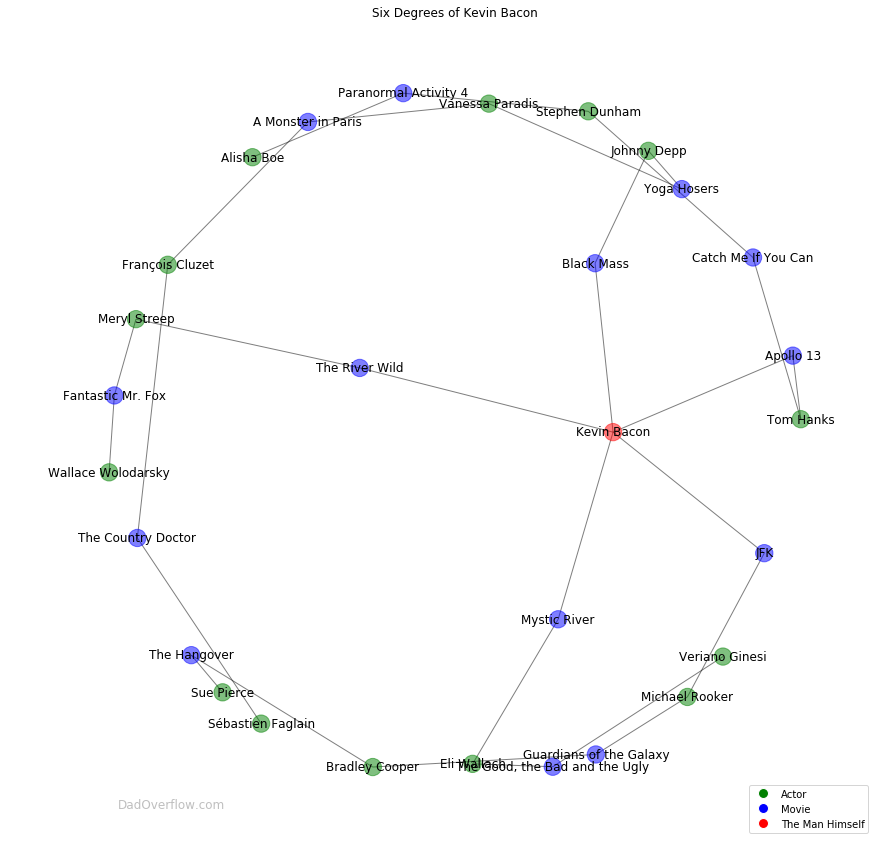

In [90]:
G_chart = nx.Graph()  # a new graph I spin up just for charting purposes

# populate the new graph with the random actors and their paths to Kevin Bacon
for a in random_actors:
    nodes_in_path = nx.shortest_path(G, source=a, target='Kevin Bacon')
    for n in nodes_in_path:
        if not G_chart.has_node(n):
            original_node = [a for a in G.nodes(data=True) if a[0]==n][0]
            # add node and its data payload to the graph i'll use in my chart
            G_chart.add_node(original_node[0], original_node[1])  
    G_chart.add_path(nodes_in_path)
    
fig, ax = plt.subplots(figsize=(15, 15))

# networkx layouts can be really tricky: something you just have to play with
pos = nx.spring_layout(G_chart, scale=0.25)
#pos = nx.circular_layout(G_chart)

color_map = [n[1]['color'] for n in G_chart.nodes(data=True)]
labels = {n:n for n in G_chart.nodes()}

plt.title('Six Degrees of Kevin Bacon')
ax.axis('off')
nx.draw_networkx(G_chart, pos, node_color=color_map, alpha=0.5, labels=labels, with_labels=True, ax=ax)

from matplotlib.lines import Line2D
custom_legend = [Line2D([0], [0], marker='o', markerfacecolor='g', markersize=10, color='w', label='Actor'), 
                 Line2D([0], [0], marker='o', markerfacecolor='b', markersize=10, color='w', label='Movie'),
                 Line2D([0], [0], marker='o', markerfacecolor='r', markersize=10, color='w', label='The Man Himself')]
ax.legend(handles=custom_legend, loc='lower right')

fig.text(0.3, 0.15, 'DadOverflow.com', fontsize=12, color='gray', ha='right', va='bottom', alpha=0.5)

### The lingering question:
Is the Bacon theory really true?  Here, I put it to the test.  I iterate through all the actors in the dataset and calculate their paths.  Out of over 54,000 actors, nearly everyone was under seven degrees of separation from Kevin Bacon.  However, over 600 had no paths to him at all.  

In [110]:
more_than_six_degrees = []
no_path_at_all = []

for a in added_actor:
    try:
        path = nx.shortest_path(G,source=a,target='Kevin Bacon')
        if int(len(path)/2) > 6:
            #print('Oh-oh: Looks like actor {0} has {1} degrees of separation from Kevin Bacon.'.format(a, int(len(path)/2)))
            more_than_six_degrees.append(a)
    except nx.NetworkXNoPath as e:
        #print('Woh: it appears actor {0} has no path at all to Kevin Bacon!'.format(a))
        no_path_at_all.append(a)
        
print('In this database...out of {0:,} actors...'.format(len(added_actor)))
print('There were {0} actors with more than 6 degrees of separation from Kevin Bacon.'.format(len(more_than_six_degrees)))
print('There were {0} actors with no path to Kevin Bacon at all!'.format(len(no_path_at_all)))

In this database...out of 54,201 actors...
There were 0 actors with more than 6 degrees of separation from Kevin Bacon.
There were 673 actors with no path to Kevin Bacon at all!
